# Problem Statement

In [66]:
# The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.
# Also, certain attributes of each product and store have been defined. The aim of this data science project is to build
# a predictive model and find out the sales of each product at a particular store.

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [153]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Loading the data

In [156]:
trainingdf=pd.read_csv(r"C:\Users\tejas\OneDrive\Desktop\Train.csv")
trainingdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [157]:
testingdf=pd.read_csv(r"C:\Users\tejas\OneDrive\Desktop\Test.csv")
testingdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [158]:
print(trainingdf.shape)
print(testingdf.shape)

(8523, 12)
(5681, 11)


In [159]:
trainingdf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Missing Value Treatments

In [160]:
trainingdf.isnull().sum() #here only two columns Item_Weight and Outlet_Size content missing values.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [161]:
testingdf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [162]:
trainingdf.Outlet_Size.value_counts() #here mode value is "Medium" so we will fill the missing values by mode as outletsize 
# has categeriocal values.

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [163]:
testingdf.Outlet_Size.value_counts() #here mode value is aslo "Medium"

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [164]:
# All values are filled by mode i.e"Medium"
trainingdf["Outlet_Size"]=trainingdf["Outlet_Size"].fillna(trainingdf["Outlet_Size"].dropna().mode().values[0])
trainingdf["Outlet_Size"].isnull().sum()

0

In [165]:
testingdf["Outlet_Size"]=testingdf["Outlet_Size"].fillna(testingdf["Outlet_Size"].dropna().mode().values[0])
testingdf["Outlet_Size"].isnull().sum()

0

In [166]:
# Now for the item weight, as it contents numerical values so we will filled the null values by mean.
print(trainingdf.Item_Weight.mean)
print(testingdf.Item_Weight.mean)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       20.750
1        8.300
2       14.600
3        7.315
4          NaN
         ...  
5676    10.500
5677     7.600
5678    10.000
5679    15.300
5680     9.500
Name: Item_Weight, Length: 5681, dtype: float64>


In [167]:
trainingdf["Item_Weight"]=trainingdf["Item_Weight"].fillna(trainingdf["Item_Weight"].dropna().mean())
trainingdf["Item_Weight"].isnull().sum()

0

In [168]:
testingdf["Item_Weight"]=testingdf["Item_Weight"].fillna(testingdf["Item_Weight"].dropna().mean())
testingdf["Item_Weight"].isnull().sum()

0

In [169]:
trainingdf.isnull().sum() #now we filled all the missing values of our data set.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [170]:
# in the item fat content column we see there are repeating vales but names are different so, we replace them 
trainingdf['Item_Fat_Content'].replace(['low fat','reg','LF'],['Low Fat','Regular','Low Fat'],inplace=True)
testingdf['Item_Fat_Content'].replace(['low fat','reg','LF'],['Low Fat','Regular','Low Fat'],inplace=True)

In [171]:
testingdf.head() #here we can see reg in 1 row is replace by Regular.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

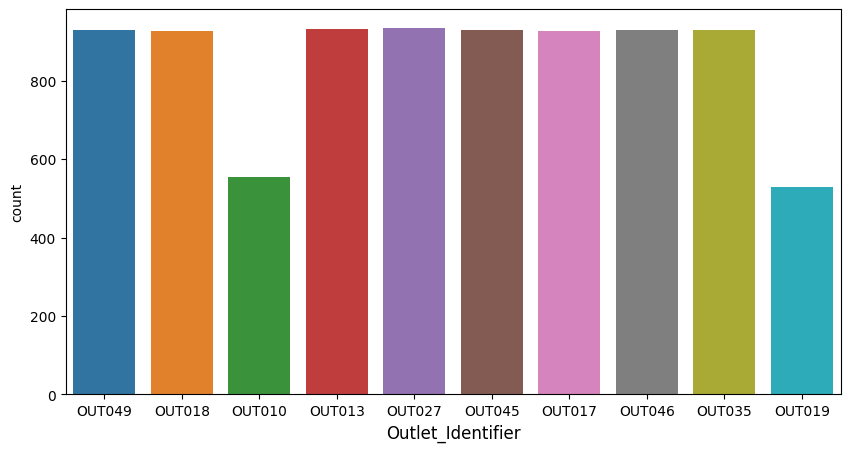

In [189]:
plt.figure(figsize=(10,5))#for categorical colums countplot is best visualization and for numerical colums histogram we will use
sns.countplot(x='Outlet_Identifier',data=trainingdf)
plt.xlabel('Outlet_Identifier',fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

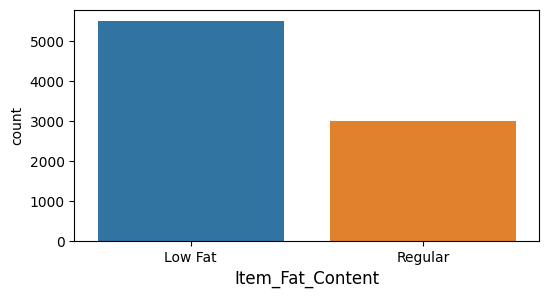

In [201]:
plt.figure(figsize=(6,3))
sns.countplot(x='Item_Fat_Content',data=trainingdf)
plt.xlabel('Item_Fat_Content',fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

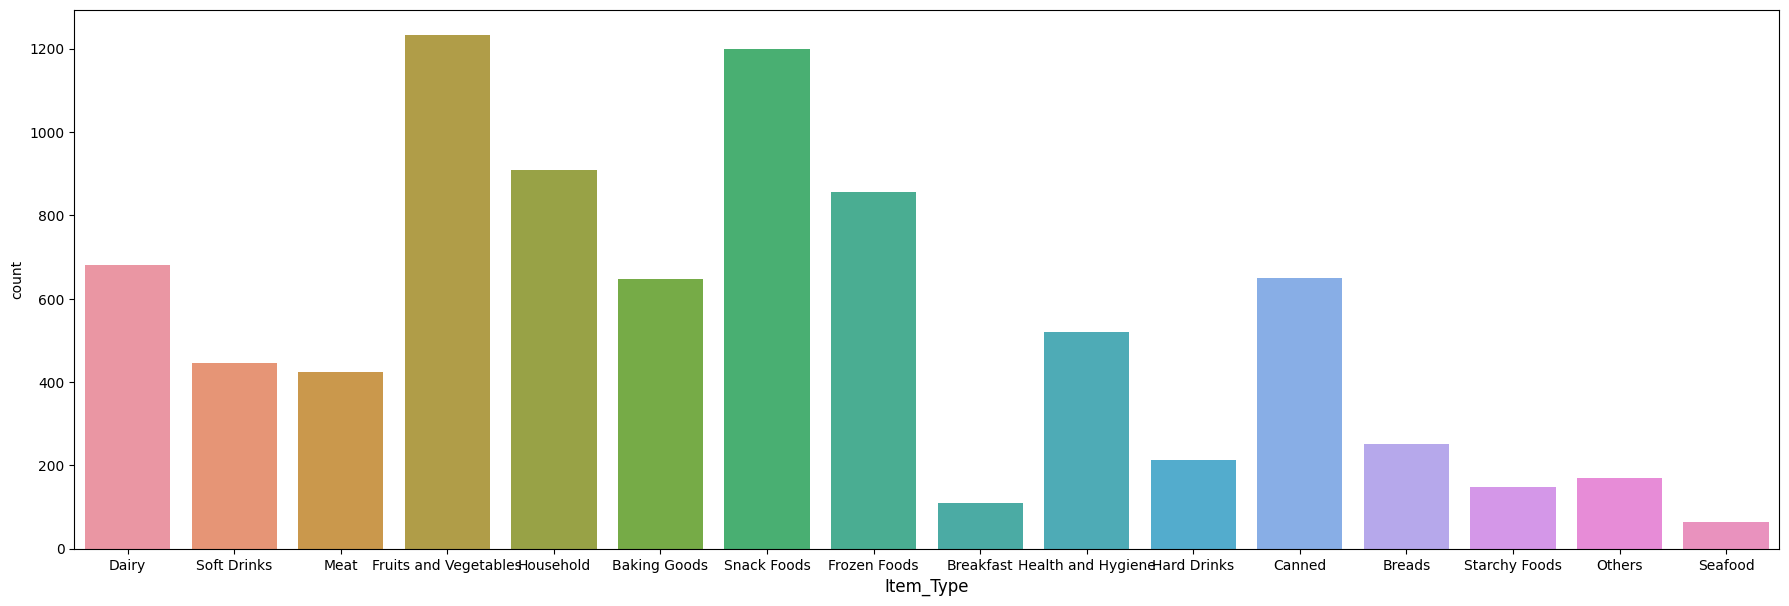

In [195]:
plt.figure(figsize=(22,7))
sns.countplot(x='Item_Type',data=trainingdf)
plt.xlabel('Item_Type',fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

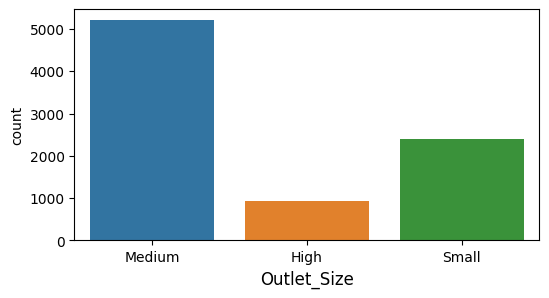

In [200]:
plt.figure(figsize=(6,3))
sns.countplot(x='Outlet_Size',data=trainingdf)
plt.xlabel('Outlet_Size',fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

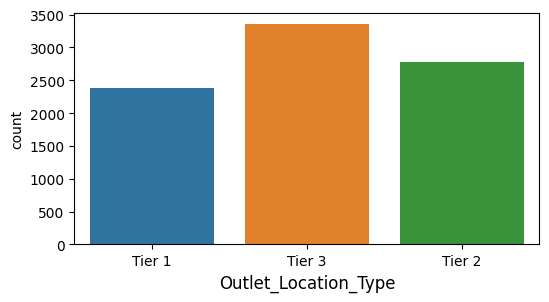

In [199]:
plt.figure(figsize=(6,3))
sns.countplot(x='Outlet_Location_Type',data=trainingdf)
plt.xlabel('Outlet_Location_Type',fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

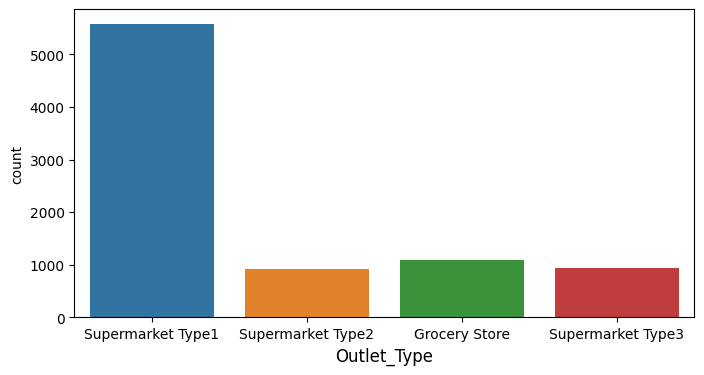

In [205]:
plt.figure(figsize=(8,4))
sns.countplot(x='Outlet_Type',data=trainingdf)
plt.xlabel('Outlet_Type',fontsize=12)
plt.show

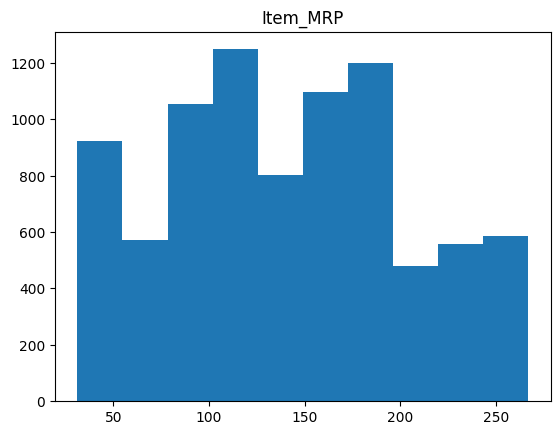

In [206]:
plt.hist(trainingdf['Item_MRP'])
plt.title('Item_MRP')
plt.show()

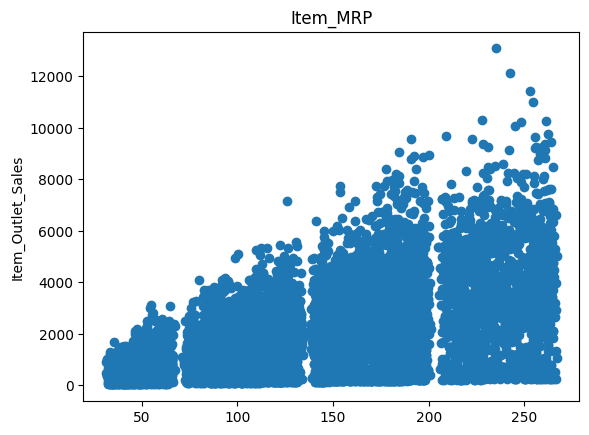

In [219]:
plt.scatter(trainingdf['Item_MRP'],trainingdf['Item_Outlet_Sales'])
plt.title('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

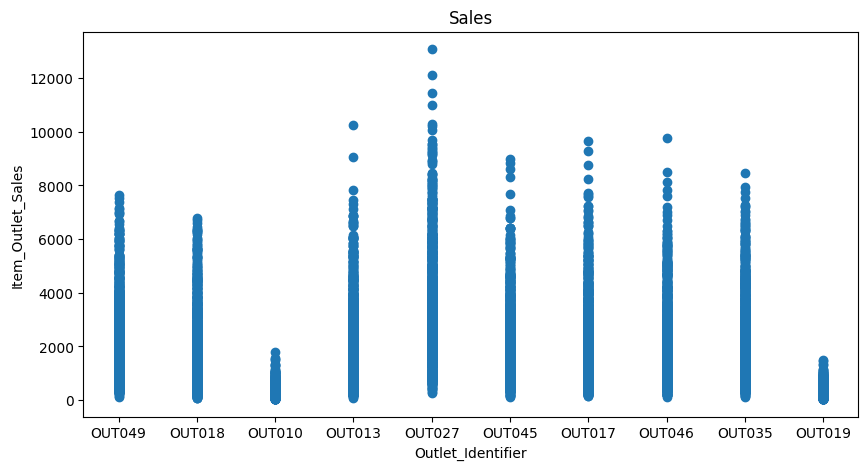

In [227]:
plt.figure(figsize=(10,5))
plt.scatter(trainingdf['Outlet_Identifier'],trainingdf['Item_Outlet_Sales'])
plt.title('Sales')
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.show()

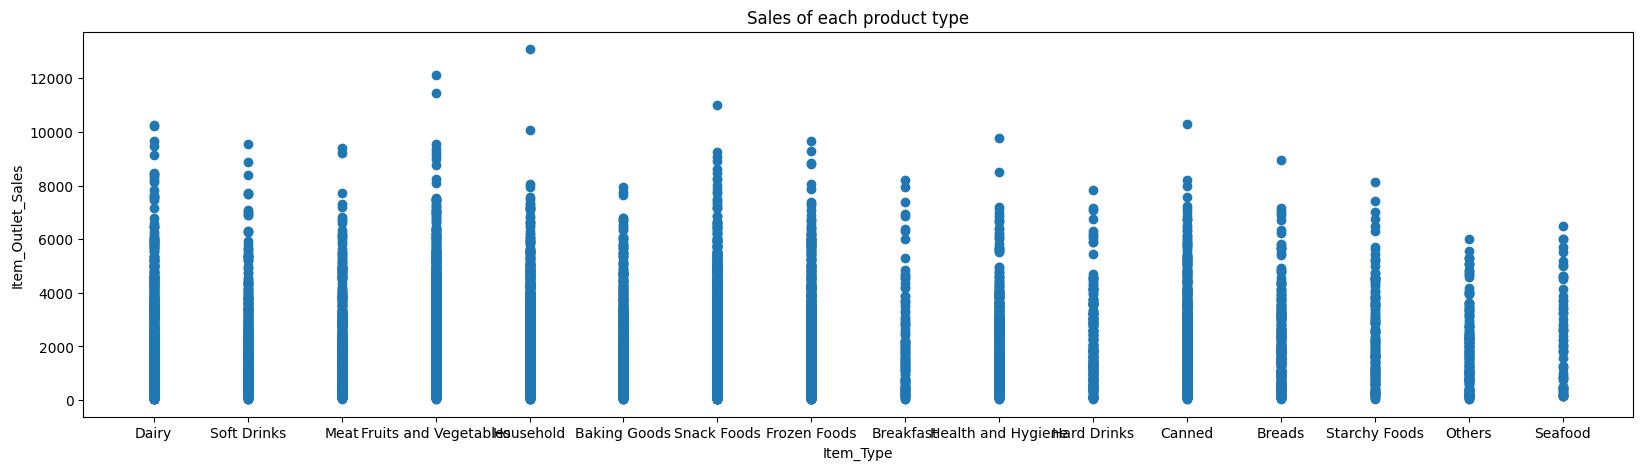

In [230]:
plt.figure(figsize=(20,5))
plt.scatter(trainingdf['Item_Type'],trainingdf['Item_Outlet_Sales'])
plt.title('Sales of each product type')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_17780\3202514369.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(trainingdf.corr())


<AxesSubplot: >

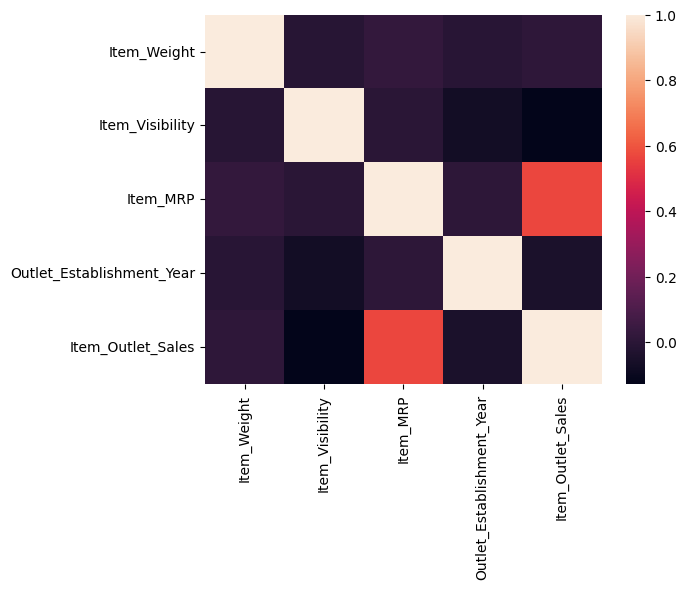

In [232]:
sns.heatmap(trainingdf.corr())

### Feature Engineering

In [233]:
trainingdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [235]:
#CATEGORICAL ENCODING
Label=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in Label:
    trainingdf[i]=LabelEncoder().fit_transform(trainingdf[i])
    testingdf[i]=LabelEncoder().fit_transform(testingdf[i])
trainingdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [238]:
#As outlet identifier and item identifier has unique value and we can not encode that so we will drop that two columns.
trainingdf=trainingdf.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
testingdf=testingdf.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [239]:
trainingdf.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [240]:
testingdf.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3


### Machine Learning Models

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [255]:
from sklearn.model_selection import cross_val_score as CVS

In [256]:
X = trainingdf.drop(columns=["Item_Outlet_Sales"],axis=1)
y = trainingdf["Item_Outlet_Sales"]

In [257]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=0)

In [258]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is",model.score(x_test,y_test)*100)
    #cross validation - it is used for better validation of model
    # eg: cv-5,train-4,test-1
    score = cross_val_score(model,x,y,cv=5)
    print("Cross validation is", np.mean(score)*100)

In [259]:
model = LinearRegression()
classify(model,X,y)

Accuracy is 50.99258910220772
Cross validation is 50.59368501934476


In [261]:
model = RandomForestRegressor()
classify(model,X,y)

Accuracy is 55.39897507607101
Cross validation is 55.00941360313243
